In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from QBUS2820 import rmse_jack, r2_jack 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from ExtraCode import getResultTable
from sklearn.model_selection import cross_val_score
from QBUS2820 import forward

In [2]:
data = pd.read_csv('TrainSalePriceNEW.csv')
y_price = data.pop('SalePrice')


In [53]:
#Extremely Random forest
regr = ExtraTreesRegressor(criterion='mae',max_depth=None,min_samples_split=2)
regr = regr.fit(data,y_price)

#
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(data,y_price)

#Forward selection
from QBUS2820 import forward

fwd = forward()
fwd.fit(data, y_price)


In [54]:
kaggle = pd.read_csv('TestSalePriceNEW.csv')

In [55]:
prediction_T = regr.predict(kaggle)
pred_GB = GBoost.predict(kaggle)
pred_F = fwd.predict(kaggle)

In [56]:
prediction = (prediction_T+pred_F+pred_GB)/3
len(prediction)

1608

In [57]:
#This is for the indices
ind = np.arange(1,1609)

In [58]:
headers = ['Id','Prediction']
predictions = pd.DataFrame({'Id':ind, 'Prediction':prediction})
predictions

,Id,Prediction
0,1,98518.762329
1,2,147706.469947
2,3,138607.831906
3,4,191711.539284
4,5,151433.221133
5,6,339282.146014
6,7,129561.013932
7,8,271363.866886
8,9,112129.272999
9,10,122289.065044


In [59]:
#Saving results into CSV file 
predictions.to_csv("Day4_2.csv", index=False)

In [4]:
#Forward selection
from QBUS2820 import forward

fwd = forward()
fwd.fit(data, y_price)

AttributeError: 'forward' object has no attribute 'params'

# XGBoost Tuning

In [48]:
data = pd.read_csv('Train6_1.csv')
final_train = data.sample(frac=0.6, random_state=1)
final_test = data[data.index.isin(final_train.index)==False]
final_train.head()
y_train = final_train.pop('SalePrice')
y_test = final_test.pop('SalePrice')


In [49]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear'}
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), 
                            cv_params, 
                             scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [15]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [50]:
optimized_GBM.grid_scores_

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [51]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [52]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

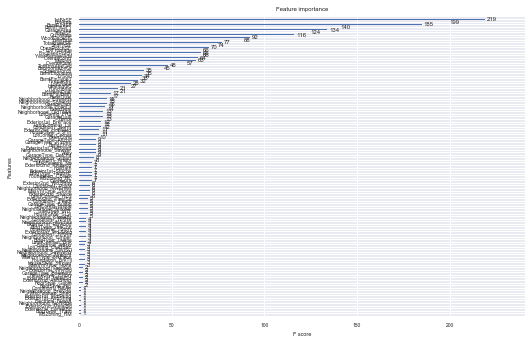

In [53]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 0.5)
xgb.plot_importance(final_gb)

In [122]:
importances = final_gb.get_fscore()
vari = []

for x in importances:
    val = importances.get(x)
    if val<5:
        vari.append(x)
print(vari)
#importances.get('OpenPorchSF')

['LandSlope', 'MSZoning_FV', 'Neighborhood_ClearCr', 'RoofStyle_Flat', 'HouseStyle_1.5Fin', 'LandContour_Low', 'KitchenAbvGr', 'GarageType_2Types', 'Heating_GasW', 'Neighborhood_Greens', 'Neighborhood_Timber', 'MiscFeature_No', 'Neighborhood_MeadowV', 'Neighborhood_Blueste']


In [55]:
testdmat = xgb.DMatrix(final_test)

In [56]:
from sklearn.metrics import accuracy_score
#y_pred = final_gb.predict(testdmat) # Predict using our testdmat
#len(y_pred)

In [57]:
r2_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [58]:
data = pd.read_csv('Train6_1.csv')
y_price = data.pop('SalePrice')
kaggle = pd.read_csv('Test6_1.csv')

xgdmat = xgb.DMatrix(data, y_price) # Create our DMatrix to make XGBoost more efficient

In [59]:
testFinaldmat = xgb.DMatrix(kaggle)

In [60]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

In [61]:
prediction = final_gb.predict(testFinaldmat)

In [62]:
#This is for the indices
ind = np.arange(1,1609)
headers = ['Id','Prediction']
prediction3 = pd.DataFrame({'Id':ind, 'Prediction':prediction})
prediction3
#Saving results into CSV file 
prediction3.to_csv("Day4_4.csv", index=False)

### It's ok...

In [123]:
pred = []
method = []

data = pd.read_csv('Train6_1.csv')
final_train = data.sample(frac=0.6, random_state=1)
final_test = data[data.index.isin(final_train.index)==False]
final_train.head()
y_train = final_train.pop('SalePrice')
y_test = final_test.pop('SalePrice')


#Forward selection
fwd = forward()
fwd.fit(final_train, y_train)
predforward = fwd.predict(final_test)
method.append('Forward')
pred.append(predforward)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(final_train,y_train)
predFinalBoost = GBoost.predict(final_test)
method.append('GBoost')
pred.append(predFinalBoost)

regr = AdaBoostRegressor(loss='linear', learning_rate = 1, n_estimators = 350)
regr = regr.fit(final_train,y_train)
adapred = regr.predict(final_test)
method.append('AdaBoost')
pred.append(adapred)

In [124]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)
testFinaldmat = xgb.DMatrix(final_test)
xgpred = final_gb.predict(testFinaldmat)
method.append('XGBoost')
pred.append(xgpred)

In [125]:
pred2 = (xgpred+adapred+predFinalBoost)/3
pred.append(pred2)
method.append('XGBoost, ada, GB')

In [126]:
pred3 = (xgpred+predFinalBoost)/2

pred5 = (xgpred+adapred)/2
pred.append(pred3)
pred.append(pred5)
method.append('xg GB')
method.append('xg adaboost')

In [127]:
#Extremely Random forest
regr2 = ExtraTreesRegressor(criterion='mae',max_depth=None,min_samples_split=2)
regr2 = regr.fit(final_train,y_train)
predFinalExtRandomForestlad = regr.predict(final_test)

pred5 = (xgpred+predFinalExtRandomForestlad+predFinalBoost)/3
pred.append(pred5)
method.append('XGBoost, random tree, GB')

In [128]:
pred6 = (xgpred+predFinalExtRandomForestlad)/2
pred.append(pred6)
method.append('xg Random tree')

In [129]:
pred10 = (xgpred+predFinalBoost+predFinalExtRandomForestlad)/3
pred.append(pred10)
method.append('XGBoost, GBoost Random Forest')

In [130]:
#LASSO
lasso = LassoCV(cv=10)
lasso.fit(final_train, y_train) 
pred_L = lasso.predict(final_test)
method.append('LASSO')
pred.append(pred_L)

In [131]:
#RIDGE
alphas = np.exp(np.linspace(-10,20,500)) 
ridge = RidgeCV(alphas=alphas, cv=10)
ridge.fit(final_train, y_train)
ridge = Ridge(alpha=ridge.alpha_)
ridge.fit(final_train, y_train)
pred_R = ridge.predict(final_test)
method.append('Ridge')
pred.append(pred_R)

In [132]:
pred11 = (xgpred+predFinalBoost+predFinalExtRandomForestlad+pred_R)/4
pred.append(pred11)
method.append('XGBoost, GBoost Random Forest Ridge')

In [133]:
pred12 = (xgpred+predFinalBoost+predFinalExtRandomForestlad+pred_L)/4
pred.append(pred12)
method.append('XGBoost, GBoost Random Forest LASSO')

In [134]:
getResultTable(method,pred)

,Test RMSE,SE,Jack R2,SE,MAE,R-square
Forward,23338.182,2443.138,0.889,0.021,15637.923,0.889
GBoost,20426.783,2995.967,0.915,0.016,13803.984,0.915
AdaBoost,25292.891,2914.202,0.869,0.019,18199.803,0.869
XGBoost,20627.247,2421.336,0.913,0.013,14183.197,0.913
"XGBoost, ada, GB",20428.834,2972.293,0.915,0.016,13973.943,0.915
xg GB,19714.371,2783.457,0.921,0.015,13455.412,0.921
xg adaboost,21533.463,2813.560,0.905,0.016,15019.400,0.905
"XGBoost, random tree, GB",20551.585,3048.254,0.914,0.017,13991.570,0.914
xg Random tree,21690.184,2924.806,0.904,0.017,15005.283,0.904
"XGBoost, GBoost Random Forest",20551.585,3048.254,0.914,0.017,13991.570,0.914


In [110]:
def getResultTable(rows, predictions):
    columns=['Test RMSE', 'SE', 'Jack R2', 'SE', 'MAE', 'R-square']
    results=pd.DataFrame(0.0, columns=columns, index=rows)

    for row,pred in zip(range(0,len(rows)),predictions):
        results.iloc[row,0], results.iloc[row,1] = rmse_jack(y_test, pred)
        results.iloc[row,2], results.iloc[row,3] = (r2_jack(y_test, pred))
        results.iloc[row,4] = mean_absolute_error(y_test, pred)
        results.iloc[row,5] = r2_score(y_test,pred)
    return results.round(3)

# Kaggle Predictions

In [111]:
data = pd.read_csv('Train6_1.csv')
y_price = data.pop('SalePrice')
kaggle = pd.read_csv('Test6_1.csv')

xgdmat = xgb.DMatrix(data, y_price) # Create our DMatrix to make XGBoost more efficient
testFinaldmat = xgb.DMatrix(kaggle)

In [112]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)
prediction = final_gb.predict(testFinaldmat)

In [113]:
#Extremely Random forest
regr = ExtraTreesRegressor(criterion='mae',max_depth=None,min_samples_split=2)
regr = regr.fit(data,y_price)
predFinalExtRandomForestlad = regr.predict(kaggle)

In [114]:

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(data,y_price)
predFinalBoost = GBoost.predict(kaggle)


In [88]:
fwd = forward()
fwd.fit(data, y_price)
predforward = fwd.predict(kaggle)

In [115]:
#RIDGE
alphas = np.exp(np.linspace(-10,20,500)) 
ridge = RidgeCV(alphas=alphas, cv=10)
ridge.fit(data, y_price)
ridge = Ridge(alpha=ridge.alpha_)
ridge.fit(data, y_price)
pred_R = ridge.predict(kaggle)

In [118]:
finalprediction = (predFinalBoost+prediction)/2

In [120]:
#This is for the indices
ind = np.arange(1,1609)
headers = ['Id','Prediction']
prediction5 = pd.DataFrame({'Id':ind, 'Prediction':finalprediction})
#Saving results into CSV file 
prediction5.to_csv("Day5_5.csv", index=False)

# Best model is just XGboost + Boosting Tree

# Allowing for model stacking now

### 

In [38]:
#simple apply to the XGB
#https://www.kaggle.com/xuejingle/final-project/output
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb


# Load the data.
#train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")

data = pd.read_csv('train.csv')
train = data.sample(frac=0.6, random_state=1)
test = data[data.index.isin(final_train.index)==False]
#final_train.head()
#y_train = final_train.pop('SalePrice')
y_test = test.pop('SalePrice')


# get Label
train_labels = train.pop('SalePrice')

features = pd.concat([train, test], keys=['train', 'test'])

# refer to the kaggle exist kernels
features.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)




features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)



# Splitting features
train_features = features.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features = features.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values


regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

regr.fit(train_features, train_labels)


y_predict = regr.predict(test_features)

#pred_df = pd.DataFrame(y_predict, index=test["Id"], columns=["SalePrice"])
#pred_df.to_csv('output.csv', header=True, index_label='Id')

In [39]:
pred.append(y_predict)
method.append('Kaggle result')
getResultTable(method,pred)

,Test RMSE,SE,Jack R2,SE,MAE,R-square
Forward,24359.124,3410.289,0.879,0.031,15688.838,0.879
GBoost,20432.749,3001.385,0.915,0.016,13734.589,0.915
AdaBoost,25563.891,2954.191,0.866,0.020,18268.699,0.866
XGBoost,21024.480,2087.364,0.910,0.012,14622.270,0.910
"XGBoost, ada, GB",20768.150,2813.459,0.912,0.016,14195.458,0.912
xg GB,19914.613,2561.481,0.919,0.013,13686.628,0.919
xg adaboost,21990.726,2618.373,0.901,0.015,15324.813,0.901
"XGBoost, random tree, GB",20776.326,2753.536,0.912,0.015,14274.310,0.912
xg Random tree,22049.488,2535.409,0.901,0.015,15484.122,0.901
"XGBoost, GBoost Random Forest",20776.326,2753.536,0.912,0.015,14274.310,0.912


In [41]:
features

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
train 8      9          20       RL          NaN     6853   Pave   NaN   
      791  792         160       FV         30.0     3180   Pave  Pave   
      571  572          20       RL         60.0     6960   Pave   NaN   
      224  225          20       RL         70.0     8050   Pave   NaN   
      498  499          20       RL          NaN     9556   Pave   NaN   
      262  263         120       RL         38.0     4740   Pave   NaN   
      73    74          90       RL         60.0     8544   Pave   NaN   
      795  796          20       RL        116.0    13501   Pave   NaN   
      670  671          60       RL        100.0    10839   Pave   NaN   
      731  732          20       RL         48.0    12137   Pave   NaN   
      436  437          80       RL         65.0     6305   Pave   NaN   
      117  118          20       RL         60.0     7024   Pave   NaN   
      245  246          80       RL          NaN    10784   Pave   NaN   
      735  736          70       RM         50.0     2500   Pave  Pave   
      493  494          20       RL         78.0     7800   Pave   NaN   
      385  386          20       RL        108.0    11358   Pave   NaN   
      443  444          90       RL          NaN     8145   Pave   NaN   
      700  701          20       RL          NaN     8125   Pave   NaN   
      592  593          20       RH         80.0    11622   Pave   NaN   
      242  243          50       RM         52.0     6240   Pave   NaN   
      555  556          20       RL         60.0     6600   Pave   NaN   
      311  312          70       RL         43.0     5707   Pave   NaN   
      394  395          20       RL          NaN    13052   Pave   NaN   
      81    82          60       RL        105.0    13650   Pave   NaN   
      370  371          20       RL         58.0     9280   Pave   NaN   
      386  387          20       RL        104.0    14418   Pave   NaN   
      698  699          50       RM         85.0     8500   Pave   NaN   
      487  488          50       RL         60.0     9144   Pave  Pave   
      683  684          50       RL         60.0     8064   Pave   NaN   
      148  149          50       RL         60.0    11409   Pave   NaN   
...        ...         ...      ...          ...      ...    ...   ...   
test  724  725          20       RL         62.0    10447   Pave   NaN   
      725  726          20       RL         90.0    12878   Pave   NaN   
      728  729          70       RM         60.0     7518   Pave   NaN   
      730  731          50       RL         50.0     7550   Pave   NaN   
      732  733          20       RL         88.0    13125   Pave   NaN   
      738  739          60       RL          NaN    12585   Pave   NaN   
      740  741          80       RL          NaN    12328   Pave   NaN   
      742  743          60       RL          NaN    16698   Pave   NaN   
      743  744          20       RL         65.0    11050   Pave   NaN   
      749  750          70       RM         80.0     4800   Pave  Grvl   
      750  751          50       RM          NaN     7920   Pave  Grvl   
      751  752          20       RL        140.0    19138   Pave   NaN   
      753  754          75       RM         75.0    13500   Pave  Grvl   
      755  756         160       RM         21.0     1890   Pave   NaN   
      758  759          60       RL         83.0    10019   Pave   NaN   
      761  762         160       RL         24.0     2308   Pave   NaN   
      767  768          30       RL         45.0     8248   Pave  Grvl   
      769  770          20       RL         75.0     9525   Pave   NaN   
      773  774          60       RL          NaN    11214   Pave   NaN   
      774  775          20       RL         43.0    12118   Pave   NaN   
      775  776          20       RL         70.0     9100   Pave   NaN   
      777  778          70       RM         90.0     9900   Pave   NaN   
      778  779  